In [1]:
import tensorflow.keras as keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(f"X train shape {x_train.shape}")
print(f"Y train shape {y_train.shape}")
print(f"X test shape {x_test.shape}")
print(f"Y test shape {y_test.shape}")

X train shape (60000, 28, 28)
Y train shape (60000,)
X test shape (10000, 28, 28)
Y test shape (10000,)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

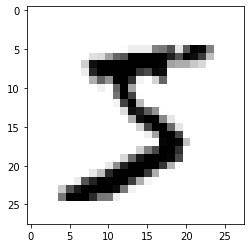

In [4]:
print(x_train[0])
plt.imshow(x_train[0],cmap=plt.cm.binary)
print(y_train[0])

In [5]:
x_test = x_test / 255
x_train = x_train / 255

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

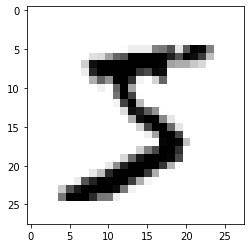

In [6]:
print(x_train[0])
plt.imshow(x_train[0],cmap=plt.cm.binary)
print(y_train[0])

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

In [8]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=3, validation_split=0.2)

Epoch 1/3
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2553 - accuracy: 0.9252 - val_loss: 0.1421 - val_accuracy: 0.9570
Epoch 2/3
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1035 - accuracy: 0.9686 - val_loss: 0.1069 - val_accuracy: 0.9684
Epoch 3/3
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0720 - accuracy: 0.9775 - val_loss: 0.0927 - val_accuracy: 0.9728


In [10]:
model.save("mnist.model")
# model = tf.keras.models.load_model('model.model')


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: mnist.model/assets


In [12]:
loss, acc = model.evaluate(x_test, y_test)
print(f"loss - {loss}")
print(f"accuracy - {acc * 100}%")

313/313 [==============================] - 0s 1ms/step - loss: 0.0995 - accuracy: 0.9692
loss - 0.09953939914703369
accuracy - 96.92000150680542%


In [11]:
test = x_test[100]
print(test.shape)
test = test.reshape(1, 28, 28)

(28, 28)


In [12]:
prediction = model.predict(test)

6
6


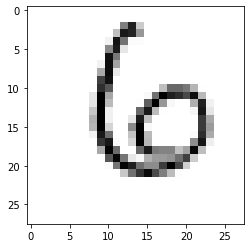

In [13]:
print(np.argmax(prediction))
print(y_test[100])
plt.imshow(x_test[100],cmap=plt.cm.binary)